In [184]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.style as style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import gaussian_kde

In [193]:
#import cleaned dataframe
album_df = pd.read_pickle('album_df.pkl')

In [194]:
album_df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,...,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,8.115241,0.061874,30.605883,0.871667,0.046364,0.000119,-7.147600,...,0.963,173.368,4,80.0,7.8,79,True,1.0,10.0,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,1.433721,0.113543,17.959151,0.724300,0.374767,0.532800,-15.015700,...,0.874,120.006,4,7.0,7.4,79,False,1.0,11.0,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,4.898979,0.119798,47.645516,0.443889,0.957778,0.205918,-13.239333,...,0.342,207.893,5,45.0,8.4,1,False,1.0,11.0,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,8.471672,0.108110,33.892371,0.562154,0.464462,0.011059,-6.111769,...,0.782,203.911,4,66.0,7.4,79,False,1.0,11.0,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.885061,0.131997,35.961798,0.377625,0.406806,0.049877,-12.121375,...,0.543,181.821,4,4.0,7.1,79,True,1.0,9.0,ElectronicRock


In [216]:
album_df.shape

(1604, 24)

# EDA Questions

1. What is the pitchfork rating distribution?
2. What are the most commonly reviewed genres?
3. How many songs are there per album?
4. What is the average rating per genre?
5. What is the relationship between Pitchfork score and popularity?

## 1. What is the pitchfork rating distribution?

In [215]:
#avg score
album_df['Score_amax'].mean()

7.253865336658361

In [200]:
#number of albums scored greater than or equal to 9
len(album_df[album_df['Score_amax'] >= 9])

47

In [213]:
#number of albums that have recieved a perfect score
len(album_df[album_df['Score_amax'] == 10])

14

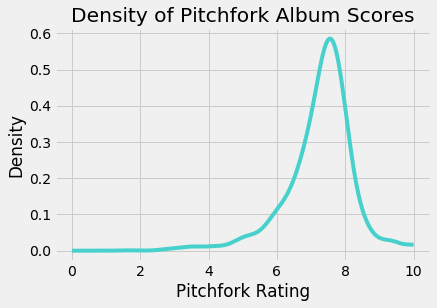

In [197]:
#plotting rating density
density = gaussian_kde(album_df['Score_amax'])
xs = np.linspace(0,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'mediumturquoise')
plt.ylabel('Density')
plt.xlabel('Pitchfork Rating')
plt.title('Density of Pitchfork Album Scores')
plt.show()

#### It appears that Pitchfork tends to rate most albums between 6-8 out of 10 with around 60% of their ratings around 7.5. The average rating for an album is 7.25 and they have only rated 47 albums above 9, 14 of those albums being scored a 10. It is important to note that this is only a subset of pitchforks reviews thus the true distributions would require more data. 

## 2. What are the most commonly reviewed genres?

In [231]:
#assign variable to plot genre counts
s = album_df.genres.value_counts()
s

Rock                      526
Rap                       265
Electronic                218
Pop/R&B                   211
Experimental              152
Folk/Country               82
Metal                      48
Jazz                       48
ElectronicRock             21
ExperimentalRock           12
Global                     11
ExperimentalElectronic     10
Name: genres, dtype: int64

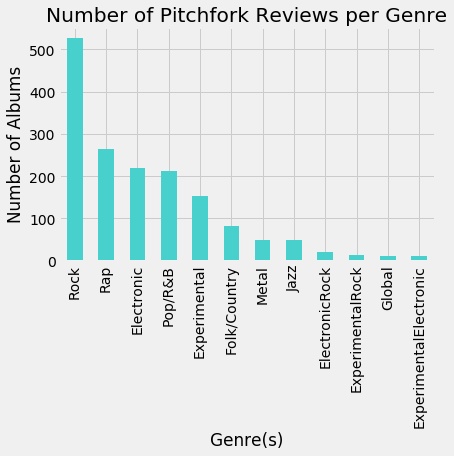

In [212]:
#plot bar chart of reviews per music genre
s.plot.bar(color='mediumturquoise')
plt.ylabel('Number of Albums')
plt.xlabel('Genre(s)')
plt.title('Number of Pitchfork Reviews per Genre')
plt.show()

#### It appears that Pitchfork tends to review Rock, Rap, Electronic, and Pop/R&B mostly. Their most commonly reviewed genre is Rock (531 reviews) which makes sense as they are an indie music review website and Indie Rock was the original indie music originating in the 1970's.

## 3. How many songs are there per album?

In [214]:
#avg number of tracks in an album
album_df['number_of_tracks'].mean()

11.450124688279303

In [206]:
#maximum number of tracks in an album
album_df['number_of_tracks'].max()

35.0

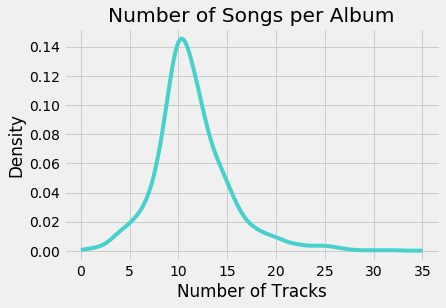

In [210]:
#code to plot the density of songs per album
density2 = gaussian_kde(album_df['number_of_tracks'])
xs2 = np.linspace(0,35,200)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs2,density2(xs2), color= 'mediumturquoise')
plt.ylabel('Density')
plt.xlabel('Number of Tracks')
plt.title('Number of Songs per Album')
plt.show()

#### From the above visualization, you can see that most albums have around 8-15 tracks. The maximum number of tracks is 35 and the average is 11.

## 4. What is the average rating per genre?

In [224]:
#define average rating groupby object
r = album_df.groupby('genres')['Score_amax'].mean()
r

genres
Electronic                7.287156
ElectronicRock            7.366667
Experimental              7.524342
ExperimentalElectronic    7.320000
ExperimentalRock          7.725000
Folk/Country              7.363415
Global                    7.227273
Jazz                      7.827083
Metal                     7.402083
Pop/R&B                   7.063981
Rap                       7.020755
Rock                      7.256654
Name: Score_amax, dtype: float64

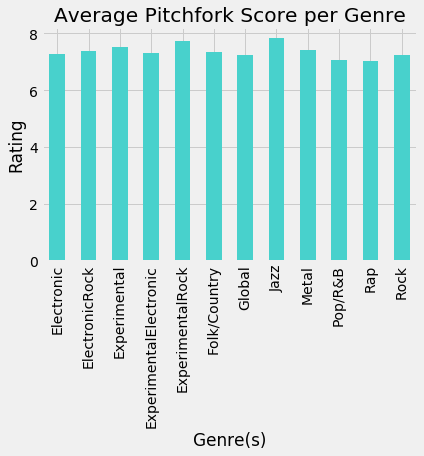

In [225]:
#plot bar graph
r.plot.bar(color='mediumturquoise')
plt.ylabel('Rating')
plt.xlabel('Genre(s)')
plt.title('Average Pitchfork Score per Genre')
plt.show()

#### Above, you can see that Jazz and Experimental Rock have the highest ratings on average while Pop/R&B and Rap are scored the lowest on average.

## 5. What is the relationship between Pitchfork score and popularity?

In [227]:
#assign variables
score = album_df.Score_amax
popularity = album_df.popularity_amax

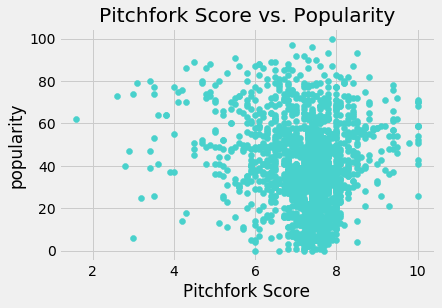

In [230]:
#create a scatter plot of score vs. popularity
plt.scatter(x=score, y=popularity, color = 'mediumturquoise')
plt.ylabel('popularity')
plt.xlabel('Pitchfork Score')
plt.title('Pitchfork Score vs. Popularity')
plt.show()

#### There is no significant correlation between the pitchfork score and the album's popularity. One interesting observation is that there are very few unpopular albums that have a high pitchfork score.